# Visualización de datos

**Plotnine es una implementación de la gramática de gráficos en Python, está basada en ggplot2 en R.** 

La **gramática de gráficos** permite a los usuarios componer visualizaciones de datos mediante la **asignación explícita de datos a objetos visuales** que componen la visualización.

Construir visualizaciones de datos con una gramática resulta poderoso, dado que hace que las visualizaciones personalizadas (y complejas) sean fáciles de pensar y luego crear, mientras que las visualizaciones simples siguen siendo simples.

Los componentes de la gramática de gráficos son los siguientes: 
1. **Datos***; variables de datos originales.
2. **Estética***; proporciona un mapeo entre variables de datos y atributos estéticos utilizados por el sistema de dibujo subyacente.
3. **Objetos geométricos***; define el tipo de objeto geométrico, por ejemplo, puntos, líneas, barras, etc. 
4. **Facetas**; permiten agrupar los datos en grupos según variables de datos y luego graficar cada grupo en un panel separado en el mismo gráfico.
5. **Transformaciones estadísticas**; especifican cálculos y agregaciones que se aplicarán a los datos antes de graficarlos.
6. **Coordenadas**; asignan la posición de los objetos a una ubicación gráfica 2D en el gráfico.
7. **Temas**; permiten controlar propiedades visuales como colores, formas y fuentes de manera generalizada.

*Los componentes mínimos necesarios para graficar. 

In [67]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_bar, geom_boxplot, geom_hline, facet_grid, labs, geom_point

## Datos

Consideremos un conjunto de datos de dominio público [mpg](https://ggplot2.tidyverse.org/reference/mpg.html) que contiene aproximadamente 230 observaciones extraídas de la base de datos de la economía de combustible que la EPA pone a disposición en [https://fueleconomy.gov/](https://fueleconomy.gov/). Contiene solo modelos que tuvieron un nuevo lanzamiento cada año entre 1999 y 2008; esto se usó como un indicador de la popularidad del automóvil.

In [9]:
from plotnine.data import mpg

In [10]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   manufacturer  234 non-null    category
 1   model         234 non-null    category
 2   displ         234 non-null    float64 
 3   year          234 non-null    int64   
 4   cyl           234 non-null    int64   
 5   trans         234 non-null    category
 6   drv           234 non-null    category
 7   cty           234 non-null    int64   
 8   hwy           234 non-null    int64   
 9   fl            234 non-null    category
 10  class         234 non-null    category
dtypes: category(6), float64(1), int64(4)
memory usage: 13.7 KB


In [11]:
mpg.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [19]:
mpg.groupby(["manufacturer"]).size()

manufacturer
audi          18
chevrolet     19
dodge         37
ford          25
honda          9
hyundai       14
jeep           8
land rover     4
lincoln        3
mercury        4
nissan        13
pontiac        5
subaru        14
toyota        34
volkswagen    27
dtype: int64

## Estética

Después de especificar los datos que deseamos visualizar, el siguiente paso es definir la variable que deseamos usar para cada eje del gráfico. 

La estética (o `aesthetics`) asigna variables de datos a atributos gráficos, como posición 2D, color, tipo de línea, tamaño, figura de los puntos, entreo otros.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


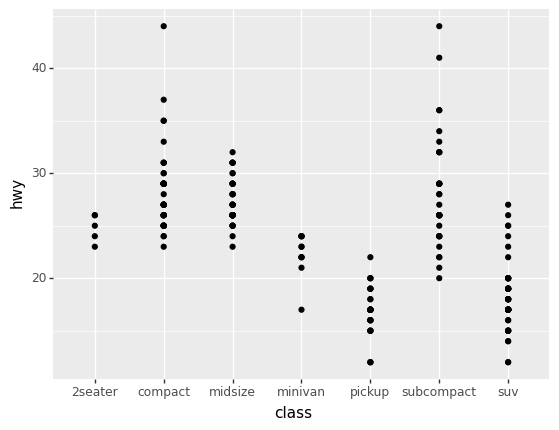

<ggplot: (8781583097385)>

In [27]:
# Crea un gráfico de puntos que muestra 
# la clase de vehículos en el eje x 
# y el consumo de combustible en carretera en millas por galón en el eje y
ggplot(mpg) + aes(x="class", y="hwy") + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


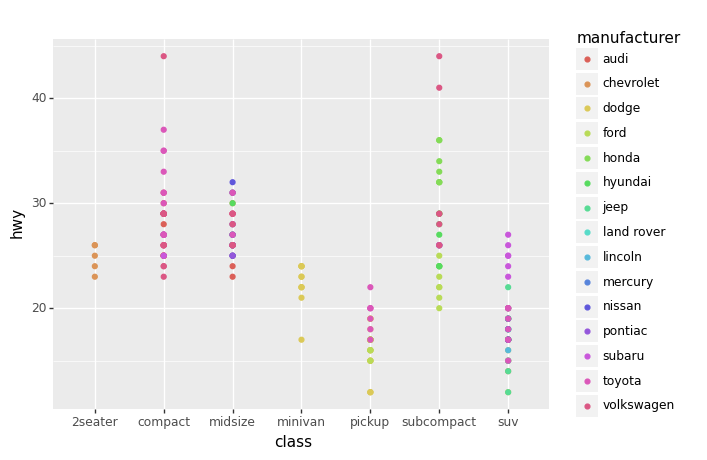

<ggplot: (8781583034269)>

In [37]:
# Crea un gráfico de puntos que muestra 
# la clase en el eje x,
# el consumo de combustible en carretera en millas por galón en el eje y
# y el fabricante en el color de los puntos
ggplot(mpg) + aes(x="class", y="hwy", color="manufacturer") + geom_point()

## Objetos geométricos

Después de definir los atributos gráficos que deseamos utilizar, debemos especificar uno o varios objetos geométricos para indicar deben dibujarse los puntos de datos. Igualmente, es posible especificar objetos primitivos, es decir, objetos geométricos independientes de los datos. 

Los objeetos geométricos (o `geoms`) pueden ser puntos, líneas, barras, polígonos, áreas, histogramas, rectas con el mejor ajuste, entre otros. Cuál utilizar [dependerá del total y tipo de variables de datos que querramos representar y qué mensaje querramos comunicar con la visualización](https://github.com/sarahiaguilar/fundamentos-cdd/blob/main/cheatsheets/ggplot2.pdf). 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


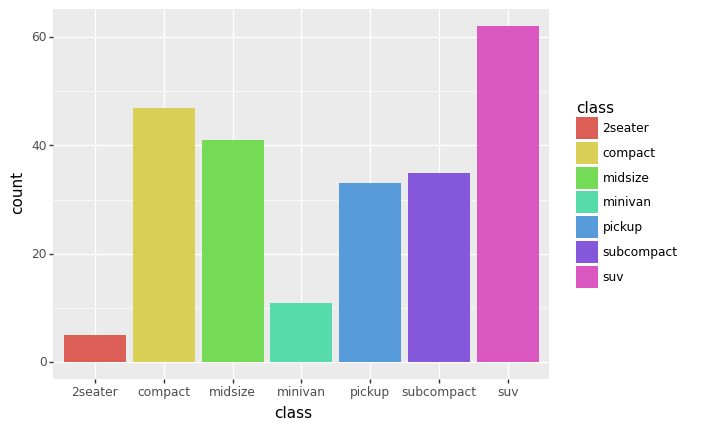

<ggplot: (8781583142309)>

In [39]:
# Crea un gráfico de barras que muestra 
# la clase en el eje x y en el color de las barras
# y la frecuencia de cada una en el eje y 
ggplot(mpg) + aes(x="class", fill="class") + geom_bar()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


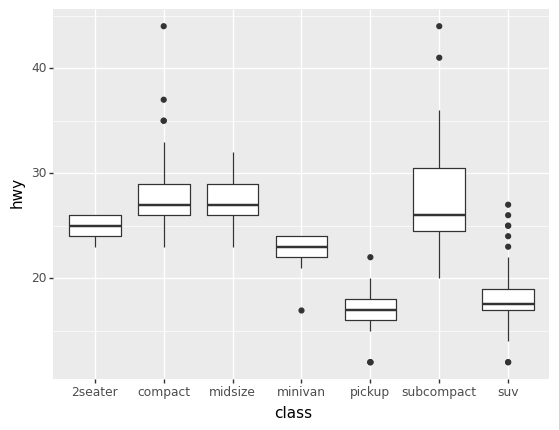

<ggplot: (8781580244513)>

In [52]:
# Crea un gráfico de cajas que muestra 
# la clase en el eje x 
# y el consumo de combustible en carretera en millas por galón en el eje y 
ggplot(mpg) + aes(x="class", y="hwy") + geom_boxplot()

Sobre los gráficos de caja en ggplot2 (y por ende, plotnine): 
* Cuartiles (25, 50, 75 percentiles), 50% es la mediana.
* El rango intercuartílico es la diferencia entre los percentiles 75 y 25.
* El bigote superior es el valor máximo de los datos que está dentro de 1.5 veces el rango intercuartílico sobre el percentil 75.
* El bigote inferior es el valor mínimo de los datos que está dentro de 1.5 veces el rango intercuartil por debajo del percentil 25.
* Los valores atípicos se consideran cualquier valor superior a 1.5 veces el rango intercuartílico sobre el percentil 75 o cualquier valor inferior a 1.5 veces el rango intercuartílico bajo el percentil 25.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


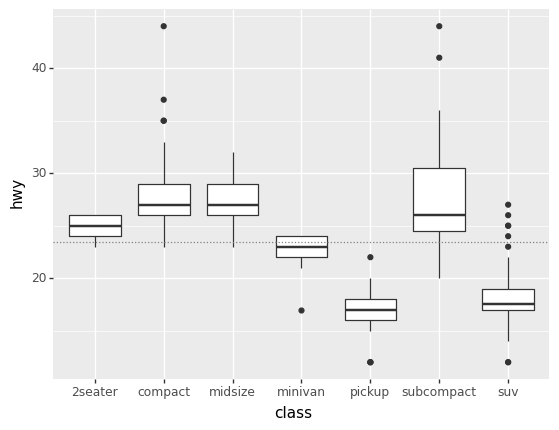

<ggplot: (8781579519569)>

In [66]:
# Crea un gráfico de cajas que muestra 
# la clase en el eje x,
# el consumo de combustible en carretera en millas por galón en el eje y y,
# la media el consumo de combustible en carretera en millas por galón como una línea punteada
mu = mpg.hwy.mean()
ggplot(mpg) + aes(x="class", y="hwy") + geom_boxplot() + geom_hline(yintercept=mu, color="gray", linetype="dotted")

## Facetas

Las facetas (o `facets`) nos permiten agrupar datos por variables y luego graficar cada grupo individualmente un panel independiente, pero en el mismo gráfico (o imagen). Esto es particularmente útil cuando queremos mostrar más de dos variables en el mismo gráfico.

Cuando nos encontremos con esta necesidad, podemos seguir los siguientes dos pasos:
1. Dividir los datos en grupos donde todos los puntos de datos de un grupo comparten los mismos valores para algunas variables.
2. Graficar cada grupo individualmente, mostrando solo las variables que no se usan en la agrupación.

/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  margin_vars = [list(data.columns & self.rows),
/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  list(data.columns & self.cols)]


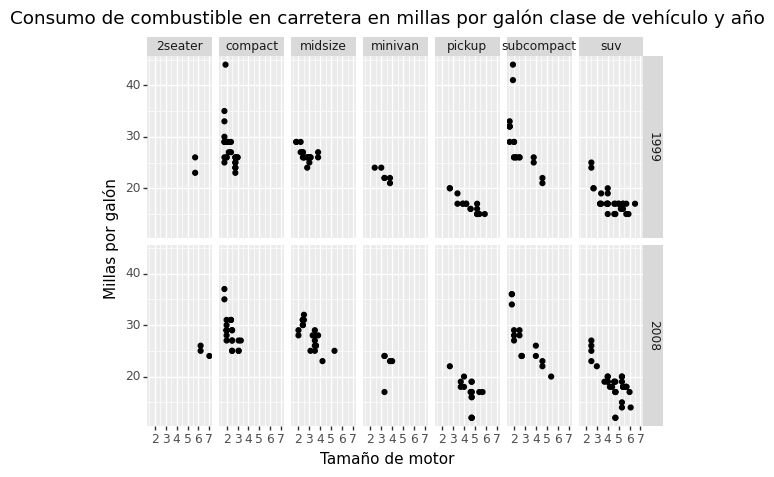

<ggplot: (8781579140513)>

In [70]:
# Crea un gráfico con facetas que muestra 
# el consumo de combustible en carretera en millas por galón en el eje y y
# y la frecuencia de cada una en el eje y 
ggplot(mpg) + aes(x="class", y="hwy") + geom_boxplot()
(
    ggplot(mpg)
    + aes(x="displ", y="hwy")
    + geom_point()
    + facet_grid(facets="year~class")
    + labs(
        x="Tamaño de motor",
        y="Millas por galón",
        title="Consumo de combustible en carretera en millas por galón clase de vehículo y año"
        )
)